### Fatemeh Mirzaei Kalani

Computer Vision practice 1


# Showing a hidden text in an image using histogram equalization and laplacian filter

In [ ]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import os

In [ ]:
def plot_histogram(image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

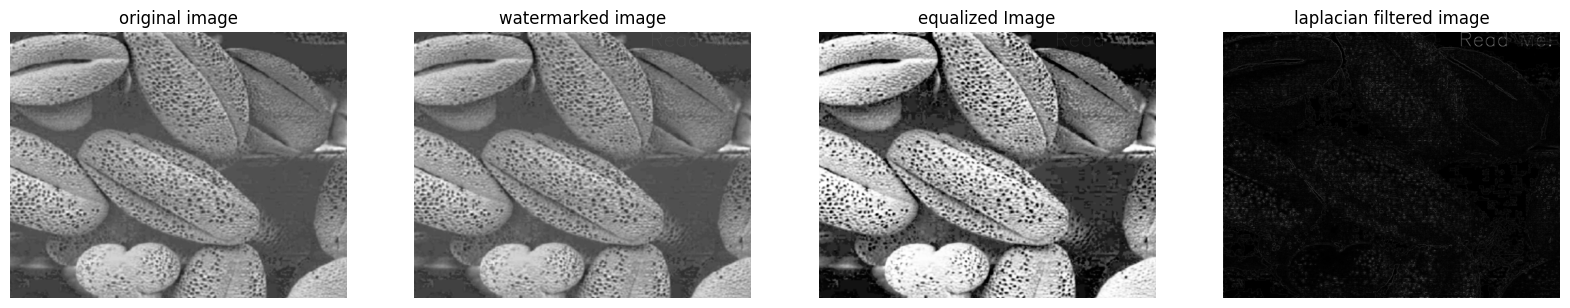

In [ ]:
image_path = 'Coffee_GRAY.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

watermarked_image = image.copy()

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 2
color = 200
thickness = 1
opacity = 0.1

(text_width, text_height), _ = cv2.getTextSize('Read Me!', font, font_scale, thickness)
position = (watermarked_image.shape[1] - text_width - 20, text_height)
cv2.putText(watermarked_image, 'Read Me!', position, font, font_scale, color, thickness, cv2.LINE_AA)
blended_image = cv2.addWeighted(watermarked_image, opacity, image, 1 - opacity, 0)

equalized_image = cv2.equalizeHist(blended_image)

#apply laplacian filter to find edges
laplacian = cv2.Laplacian(equalized_image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

plt.figure(figsize=(20,20))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('original image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(blended_image, cmap='gray')
plt.title('watermarked image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('equalized Image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(laplacian, cmap='gray')
plt.title('laplacian filtered image')
plt.axis('off')

plt.show()

(-0.5, 1033.5, 815.5, -0.5)

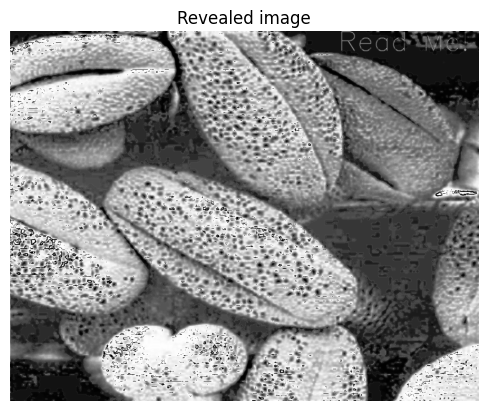

In [ ]:
revealed = laplacian + equalized_image
plt.imshow(revealed, cmap='gray')
plt.title('Revealed image')
plt.axis('off')

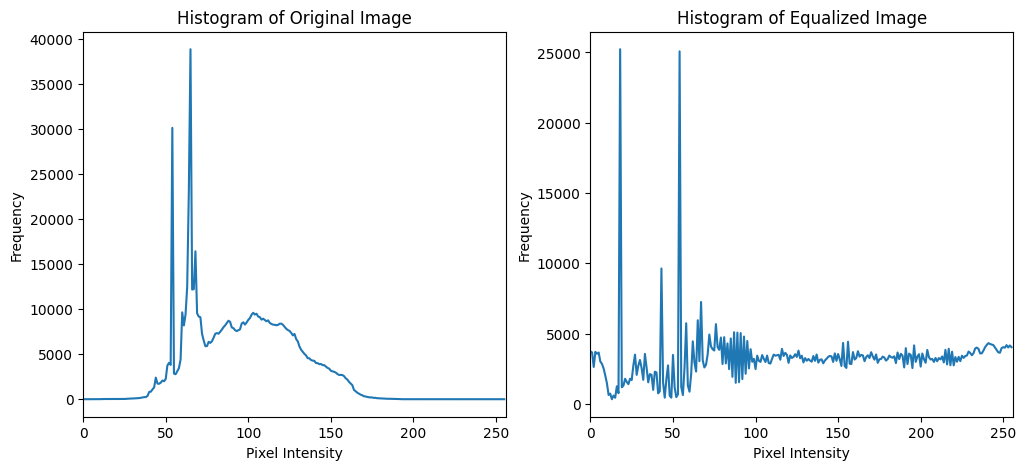

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_histogram(image, 'Histogram of Original Image')

plt.subplot(1, 2, 2)
plot_histogram(revealed, 'Histogram of Revealed Image')
plt.show()

# Bit Plane
We can see that the size of compressed image is lower.

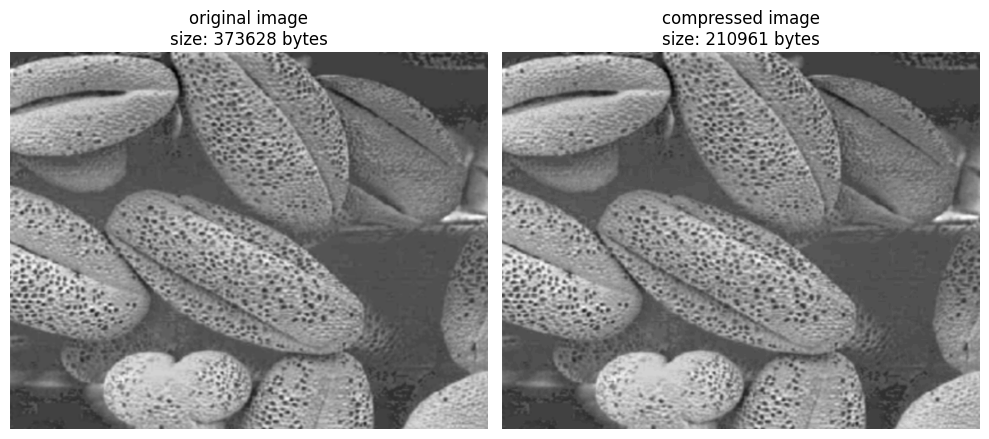

In [ ]:
def bit_plane(image):
    bit_mask = 0b11111100  # This keeps the top 6 bits and sets the two least significant bits (LSBs) to 0
    compressed_image = cv2.bitwise_and(image, bit_mask)
    return compressed_image

image = cv2.imread('Coffee_GRAY.png', cv2.IMREAD_GRAYSCALE)

compressed_image = bit_plane(image)

cv2.imwrite('original_image.png', image)
cv2.imwrite('compressed_image.png', compressed_image)

original_size = os.path.getsize('original_image.png')
compressed_size = os.path.getsize('compressed_image.png')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f'original image\nsize: {original_size} bytes')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title(f'compressed image\nsize: {compressed_size} bytes')
plt.axis('off')

plt.tight_layout()
plt.show()